<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/db/Logo_ITESO_normal.jpg" width="150px" height="90px" />

## Ciencia de Datos e Inteligencia de Negocios

### Proyecto Final.- Insurance.

>##### Carlos Cuevas
>##### Mateo Verea
>##### Oscar Villa

### Objetivo:

Dada la base da datos, se definirán métricas para analizar el desempeño de agentes de seguros basado en diferentes atributos, como la demografía, preductos vendidos, zona, etc. Con la finalidad de mejorar el conocimiento existente y que se utiliza para la segmentación de agentes bajo un sistema de predicción supervisado.

In [80]:
#Importar librerías necesarias.
import time
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt
from mylib import mylib
from sklearn import svm
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import (confusion_matrix,precision_score,recall_score,f1_score,accuracy_score)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [66]:
#Database asignada
data = pd.read_csv('finalapi.csv')
data.head()

,AGENCY_ID,PRIMARY_AGENCY_ID,PROD_ABBR,PROD_LINE,STATE_ABBR,STAT_PROFILE_DATE_YEAR,RETENTION_POLY_QTY,POLY_INFORCE_QTY,PREV_POLY_INFORCE_QTY,NB_WRTN_PREM_AMT,...,PL_BOUND_CT_ELINKS,PL_QUO_CT_ELINKS,PL_BOUND_CT_PLRANK,PL_QUO_CT_PLRANK,PL_BOUND_CT_eQTte,PL_QUO_CT_eQTte,PL_BOUND_CT_APPLIED,PL_QUO_CT_APPLIED,PL_BOUND_CT_TRANSACTNOW,PL_QUO_CT_TRANSACTNOW
0,3,3,BOILERMACH,CL,IN,2005,0,0,0,40.0,...,0,0,0,103,50,288,0,0,0,0
1,3,3,BOILERMACH,CL,IN,2006,0,0,0,151.0,...,0,0,0,103,50,288,0,0,0,0
2,3,3,BOILERMACH,CL,IN,2007,0,0,0,40.0,...,0,0,0,103,50,288,0,0,0,0
3,3,3,BOILERMACH,CL,IN,2008,0,0,0,69.0,...,0,0,0,103,50,288,0,0,0,0
4,3,3,BOILERMACH,CL,IN,2009,0,0,0,28.0,...,0,0,0,103,50,288,0,0,0,0


In [67]:
reporte=mylib.dqr(data)
reporte

,Nombres,Data_Types,Missing_Values,Present_Values,Unique_Values,Min,Max
AGENCY_ID,AGENCY_ID,int64,0,213328,1623,3,9998
PRIMARY_AGENCY_ID,PRIMARY_AGENCY_ID,int64,0,213328,588,3,99999
PROD_ABBR,PROD_ABBR,object,0,213328,28,ANNIV,YACHT
PROD_LINE,PROD_LINE,object,0,213328,2,CL,PL
STATE_ABBR,STATE_ABBR,object,0,213328,6,IN,WV
STAT_PROFILE_DATE_YEAR,STAT_PROFILE_DATE_YEAR,int64,0,213328,11,2005,2015
RETENTION_POLY_QTY,RETENTION_POLY_QTY,int64,0,213328,4952,0,21979
POLY_INFORCE_QTY,POLY_INFORCE_QTY,int64,0,213328,5190,0,22968
PREV_POLY_INFORCE_QTY,PREV_POLY_INFORCE_QTY,int64,0,213328,5327,0,99999
NB_WRTN_PREM_AMT,NB_WRTN_PREM_AMT,float64,0,213328,36088,0,556930


Podemos observar que la base de datos requiere de una limpieza profunda, además que hay datos que a simple vista podemos discriminar para realizar una clasificación.

Un dato favorable es que no hay datos faltantes, por lo cual no tenemos que rellenar nada.

Primeramente se eliminan los datos cuya información solo expresa años, dado que no afectan un comportamiento de vendedor, además de ser columnas muy sucias, donde los valores máximos son 99999.

In [74]:
datan=data.drop(['AGENCY_ID','PRIMARY_AGENCY_ID','PROD_ABBR','PROD_LINE','STATE_ABBR','VENDOR_IND','VENDOR','STAT_PROFILE_DATE_YEAR','MONTHS','AGENCY_APPOINTMENT_YEAR','MAX_AGE','MIN_AGE','PL_START_YEAR','PL_END_YEAR','COMMISIONS_START_YEAR','COMMISIONS_END_YEAR','CL_START_YEAR','CL_END_YEAR','ACTIVITY_NOTES_START_YEAR','ACTIVITY_NOTES_END_YEAR'],axis=1)
datan.head()

,RETENTION_POLY_QTY,POLY_INFORCE_QTY,PREV_POLY_INFORCE_QTY,NB_WRTN_PREM_AMT,WRTN_PREM_AMT,PREV_WRTN_PREM_AMT,PRD_ERND_PREM_AMT,PRD_INCRD_LOSSES_AMT,RETENTION_RATIO,LOSS_RATIO,...,PL_BOUND_CT_ELINKS,PL_QUO_CT_ELINKS,PL_BOUND_CT_PLRANK,PL_QUO_CT_PLRANK,PL_BOUND_CT_eQTte,PL_QUO_CT_eQTte,PL_BOUND_CT_APPLIED,PL_QUO_CT_APPLIED,PL_BOUND_CT_TRANSACTNOW,PL_QUO_CT_TRANSACTNOW
0,0,0,0,40.0,3074.63,149.00,3005.77,0.0,99999.0,0.0,...,0,0,0,103,50,288,0,0,0,0
1,0,0,0,151.0,6562.28,5438.55,6433.44,0.0,99999.0,0.0,...,0,0,0,103,50,288,0,0,0,0
2,0,0,0,40.0,6205.11,6562.28,6357.09,0.0,99999.0,0.0,...,0,0,0,103,50,288,0,0,0,0
3,0,0,0,69.0,5159.89,6205.11,5315.01,0.0,99999.0,0.0,...,0,0,0,103,50,288,0,0,0,0
4,0,0,0,28.0,4527.71,5159.89,4706.47,0.0,99999.0,0.0,...,0,0,0,103,50,288,0,0,0,0


Los valores 99999 serán sustituidos por la media de la columna, excluyendo, obviamente, dichos valores.

In [75]:
mean_PREV_POLY_INFORCE_QTY=194
mean_RETENTION_RATIO=0
mean_LOSS_RATIO=1
mean_LOSS_RATIO_3YR=0
mean_GROWTH_RATE_3YR=0
mean_ACTIVE_PRODUCERS=27
mean_CL_BOUND_CT_MDS=1
mean_CL_QUO_CT_MDS=4
mean_CL_BOUND_CT_SBZ=2
mean_CL_QUO_CT_SBZ=4
mean_CL_BOUND_CT_eQT=1
mean_CL_QUO_CT_eQT=2
mean_PL_BOUND_CT_ELINKS=1
mean_PL_QUO_CT_ELINKS=57
mean_PL_BOUND_CT_PLRANK=6
mean_PL_QUO_CT_PLRANK=153
mean_PL_BOUND_CT_eQTte=49
mean_PL_QUO_CT_eQTte=224
mean_PL_BOUND_CT_APPLIED=1
mean_PL_QUO_CT_APPLIED=8
mean_PL_BOUND_CT_TRANSACTNOW=0
mean_PL_QUO_CT_TRANSACTNOW=0

In [76]:
datan.PREV_POLY_INFORCE_QTY=datan['PREV_POLY_INFORCE_QTY'].replace(to_replace=99999, value=mean_PREV_POLY_INFORCE_QTY)
datan.RETENTION_RATIO=datan['RETENTION_RATIO'].replace(to_replace=99999, value=mean_RETENTION_RATIO)
datan.LOSS_RATIO=datan['LOSS_RATIO'].replace(to_replace=[99999, 99998, 99997], value=mean_LOSS_RATIO)
datan.LOSS_RATIO_3YR=datan['LOSS_RATIO_3YR'].replace(to_replace=99999, value=mean_LOSS_RATIO_3YR)
datan.GROWTH_RATE_3YR=datan['GROWTH_RATE_3YR'].replace(to_replace=99999, value=mean_GROWTH_RATE_3YR)
datan.ACTIVE_PRODUCERS=datan['ACTIVE_PRODUCERS'].replace(to_replace=99999, value=mean_ACTIVE_PRODUCERS)
datan.CL_BOUND_CT_MDS=datan['CL_BOUND_CT_MDS'].replace(to_replace=99999, value=mean_CL_BOUND_CT_MDS)
datan.CL_QUO_CT_MDS=datan['CL_QUO_CT_MDS'].replace(to_replace=99999, value=mean_CL_QUO_CT_MDS)
datan.CL_BOUND_CT_SBZ=datan['CL_BOUND_CT_SBZ'].replace(to_replace=99999, value=mean_CL_BOUND_CT_SBZ)
datan.CL_QUO_CT_SBZ=datan['CL_QUO_CT_SBZ'].replace(to_replace=99999, value=mean_CL_QUO_CT_SBZ)
datan.CL_BOUND_CT_eQT=datan['CL_BOUND_CT_eQT'].replace(to_replace=99999, value=mean_CL_BOUND_CT_eQT)
datan.CL_QUO_CT_eQT=datan['CL_QUO_CT_eQT'].replace(to_replace=99999, value=mean_CL_QUO_CT_eQT)
datan.PL_BOUND_CT_ELINKS=datan['PL_BOUND_CT_ELINKS'].replace(to_replace=99999, value=mean_PL_BOUND_CT_ELINKS)
datan.PL_QUO_CT_ELINKS=datan['PL_QUO_CT_ELINKS'].replace(to_replace=99999, value=mean_PL_QUO_CT_ELINKS)
datan.PL_BOUND_CT_PLRANK=datan['PL_BOUND_CT_PLRANK'].replace(to_replace=99999, value=mean_PL_BOUND_CT_PLRANK)
datan.PL_QUO_CT_PLRANK=datan['PL_QUO_CT_PLRANK'].replace(to_replace=99999, value=mean_PL_QUO_CT_PLRANK)
datan.PL_BOUND_CT_eQTte=datan['PL_BOUND_CT_eQTte'].replace(to_replace=99999, value=mean_PL_BOUND_CT_eQTte)
datan.PL_QUO_CT_eQTte=datan['PL_QUO_CT_eQTte'].replace(to_replace=99999, value=mean_PL_QUO_CT_eQTte)
datan.PL_BOUND_CT_APPLIED=datan['PL_BOUND_CT_APPLIED'].replace(to_replace=99999, value=mean_PL_BOUND_CT_APPLIED)
datan.PL_QUO_CT_APPLIED=datan['PL_QUO_CT_APPLIED'].replace(to_replace=99999, value=mean_PL_QUO_CT_APPLIED)
datan.PL_BOUND_CT_TRANSACTNOW=datan['PL_BOUND_CT_TRANSACTNOW'].replace(to_replace=99999, value=mean_PL_BOUND_CT_TRANSACTNOW)
datan.PL_QUO_CT_TRANSACTNOW=datan['PL_QUO_CT_TRANSACTNOW'].replace(to_replace=99999, value=mean_PL_QUO_CT_TRANSACTNOW)
#datan.PROD_LINE=pd.get_dummies(datan,prefix='PROD_LINE')

In [77]:
reporte1=mylib.dqr(datan)
reporte1

,Nombres,Data_Types,Missing_Values,Present_Values,Unique_Values,Min,Max
RETENTION_POLY_QTY,RETENTION_POLY_QTY,int64,0,213328,4952,0,21979
POLY_INFORCE_QTY,POLY_INFORCE_QTY,int64,0,213328,5190,0,22968
PREV_POLY_INFORCE_QTY,PREV_POLY_INFORCE_QTY,int64,0,213328,5326,0,24335
NB_WRTN_PREM_AMT,NB_WRTN_PREM_AMT,float64,0,213328,36088,0,556930
WRTN_PREM_AMT,WRTN_PREM_AMT,float64,0,213328,117534,-202778,1.71574e+06
PREV_WRTN_PREM_AMT,PREV_WRTN_PREM_AMT,float64,0,213328,115623,-186181,1.90457e+06
PRD_ERND_PREM_AMT,PRD_ERND_PREM_AMT,float64,0,213328,148184,-164349,1.7805e+06
PRD_INCRD_LOSSES_AMT,PRD_INCRD_LOSSES_AMT,float64,0,213328,49400,-5e+06,6.24123e+06
RETENTION_RATIO,RETENTION_RATIO,float64,0,213328,21376,0,1
LOSS_RATIO,LOSS_RATIO,float64,0,213328,53124,-756.229,77292.3


Iniciaremos aplicando el KMeans a los datos tras su limpieza.

In [82]:
model = KMeans(n_clusters=3,random_state=180,init='k-means++')
t0 = time.time()
model = model.fit(datan)
t_model = time.time()-t0

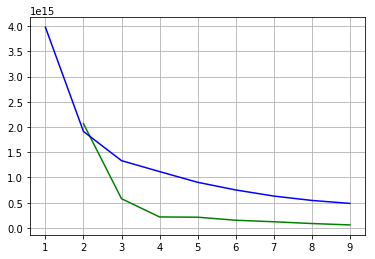

In [84]:
inercia = np.zeros(10)
for k in np.arange(1,10):
    model = KMeans(n_clusters=k,random_state=180,init='k-means++')
    model = model.fit(datan)
    inercia[k] = model.inertia_
    
velocidad = np.diff(inercia)
plt.plot(np.arange(2,10),-1*velocidad[1:],c='g')
plt.plot(np.arange(1,10),inercia[1:],c='b')
plt.grid()
plt.show()

In [86]:
model = KMeans(n_clusters=2,random_state=180,init='k-means++')
model = model.fit(datan)
Ypredict = model.predict(datan)

array([0, 0, 0, ..., 0, 0, 0])

In [87]:
ind = Ypredict==0
d0 = np.sum(ind)
ind = Ypredict==1
d1 = np.sum(ind)
d0,d1

(208130, 5198)

Ahora el PCA

In [89]:
medias = datan.mean(axis=0)
desv = datan.std(axis=0)
data_n = (datan-medias)/desv

#Paso 1. calcular las covarianzas
data_cov = np.cov(data_n.transpose())

#Paso 2 y 3. Calcular los vectores y valores propios
w,v = np.linalg.eig(data_cov)

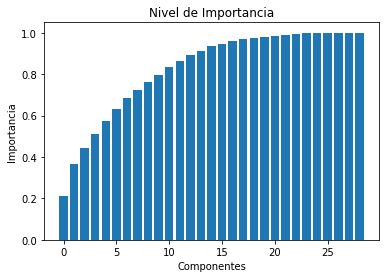

In [90]:
#%% Importancia
indx = np.argsort(w)[::-1]
w = w[indx]
v = v[indx]

porcentaje = w/np.sum(w)
porcentaje_acum = np.cumsum(porcentaje)
plt.bar(np.arange(len(porcentaje_acum)),porcentaje_acum)
plt.title('Nivel de Importancia')
plt.ylabel('Importancia')
plt.xlabel('Componentes')
plt.show()

Podríamos reducir incluso a 15 componentes para mantener arriba del 85% de la información

In [95]:
transform = v[:,0:15]
test = np.matrix(data_n)*np.matrix(transform)

In [98]:
#SVM MODELO
clf = svm.SVC(kernel='rbf')
Y = test[:]
clf.fit(test, Y)

ValueError: bad input shape (213328, 15)

In [99]:
Z = clf.predict(test)

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [100]:
accuracy_score(Y,Z)
precision_score(Y,Z)
recall_score(Y,Z)

NameError: name 'Z' is not defined